# Make an Excel Ray file for Beam4


- Geometry : Auxiliary Telescope Geometry of Optical for CTIO 0.9 m 

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : February 28th 2017
- update : March 15th 2017

Simple 2D optical geometry for the optical setup of CTIO 0.9m telescope with Ronchi Grating.
This is a tool to adjust the CCD position wrt Filter wheel.
Here 4 wavelength are generated.
The source incident angle must be provided in terms of angles $(\alpha_x,\alpha_y)$.


This is a python notebook (not a sagemath notebook)
- command:
** ipython notebook **

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [62]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


## Output filename and desired wavelength

In [63]:
root_filename="Beam4_Rayfile_"

In [64]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4

In [65]:
Wavelength_B=0.0004
Wavelength_G=0.0006
Wavelength_R=0.0008
Wavelength_I=0.001

In [66]:
theta_x=10.0  # angle in arcmin
theta_y=.0  # angle in arcmin 

In [67]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [68]:
if theta_x_num>0:
    theta_nstr='{:0>2}'.format(theta_x_num)
    theta_x_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_x_num)
    theta_x_str="m"+theta_nstr

In [69]:
if theta_y_num>0:
    theta_nstr='{:0>2}'.format(theta_y_num)
    theta_y_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_y_num)
    theta_y_str="m"+theta_nstr

In [70]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_allwl_{}_{}.xlsx".format(NBEAM*NWL,theta_x_str,theta_y_str)

In [71]:
Beam4_Rayfile

'Beam4_Rayfile_484_allwl_p100_m00.xlsx'

## Constants for conversions

In [72]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [73]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [74]:
deg_to_rad=np.pi/180.

In [75]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope
--------------------------------------------------------

#### Telescope

In [76]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    

In [77]:
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### Filter

In [78]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

In [79]:
Filt_size

76.19999999999999

#### CCD Detector

In [80]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*1e-3 # CCD size in mm, 5 cm or 2 inches

In [81]:
Det_size

49.152

In [82]:
Det_pix_angl=Det_xpic*micr_to_m/Tel_Focal_Length   # in radian

In [83]:
print "pixel viewing angle in arcsec = ", Det_pix_angl*rad_to_deg*arcdeg_to_arcsec

pixel viewing angle in arcsec =  0.392885345233


## Location of the source in the field of view

The Field of view of the delescope is 13.6 arcmin


- ($\theta_x, \theta_y$) in arcmin to be specified
- ($\alpha_x, \alpha_y$) in radian calculated 

In [84]:
theta_max=13.6/2.
theta_max=-13.6/2.

In [85]:
alpha_x=theta_x*arcmin_ro_rad
alpha_y=theta_y*arcmin_ro_rad

## Where to start the tracking of rays

- Units in mm
- The origin is where the optical effective conveging system start at O(0,0,0)
- (X0,Y0,Z0) : coordinates of Beam rays starting points

In [86]:
D0=Filt_D*m_to_mm  # distance between plane where the trcking beam start

In [87]:
Z0=Tel_Focal_Length*m_to_mm

In [88]:
Z1=Z0-2.*D0  # please set where you want to start the beam

In [89]:
XMIN=-Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))
XMAX=Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))

In [90]:
YMIN=-Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))
YMAX=Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))

# Number of points

In [91]:
X = np.linspace(XMIN, XMAX, NBEAM_X)
Y = np.linspace(YMIN, YMAX, NBEAM_Y)
XX, YY = np.meshgrid(X, Y)

In [92]:
pts = itertools.product(X, Y)

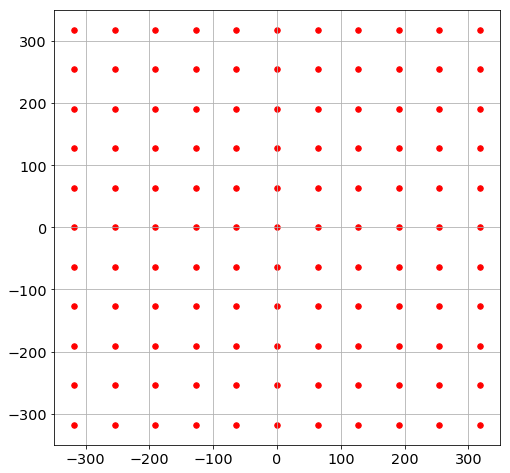

In [93]:
plt.grid()
plt.scatter(*zip(*pts), marker='o', s=30, color='red')

Text(0.5,1,'Impact points at telescope aperture')

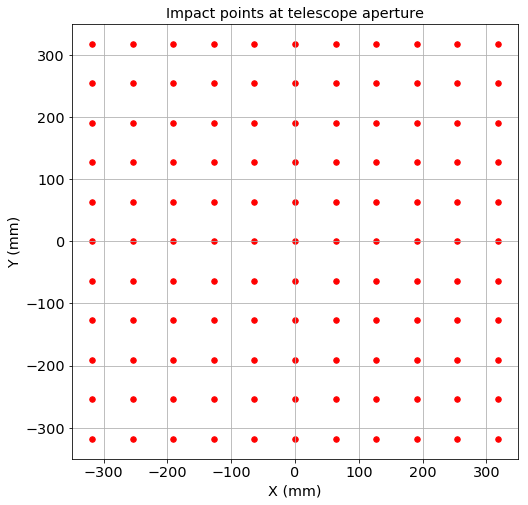

In [94]:
plt.scatter(XX,YY, marker='o', s=30, color='red')
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)
plt.grid()
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("Impact points at telescope aperture")

In [95]:
def GetCosinusDirector(X,Y,thealpha_x,thealpha_y,f):
    """
    The size of X,Y is the number of Rays
    """
    
    
    Norm=np.sqrt( np.power(X+f*np.tan(thealpha_x),2) + np.power(Y+f*np.tan(thealpha_y),2)+ f**2)
    UX=-(X+f*np.tan(thealpha_x))/Norm
    UY=-(Y+f*np.tan(thealpha_y))/Norm
    UZ=f/Norm
    return UX,UY,UZ    
    

In [96]:
UX,UY,UZ=GetCosinusDirector(XX,YY,alpha_x,alpha_y,Z0)

Text(0.5,1,'Vector field')

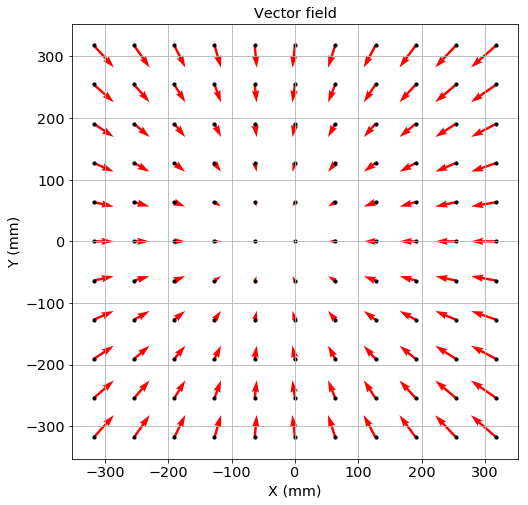

In [97]:

plt.grid()
q = plt.quiver(XX,YY,UX,UY,angles='xy',scale=0.5,color='r')
plt.scatter(XX,YY, marker='o', s=10, color='black')
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("Vector field")

In [98]:
def GetStartingPoint(X,Y,thealpha_x,the_alpha_y,f,Z0):
    theX0=(1-Z0/f)*X-Z0*np.tan(alpha_x)
    theY0=(1-Z0/f)*Y-Z0*np.tan(alpha_y)
    return theX0,theY0
    

In [99]:
(X0,Y0)=GetStartingPoint(XX,YY,alpha_x,alpha_y,Z0,Z1)

Text(0.5,1,'Impact point at selected entrance of Ray tracer')

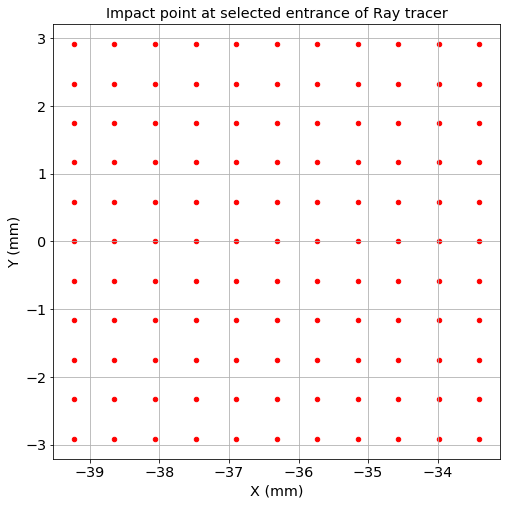

In [100]:
plt.scatter(X0,Y0, marker='o', s=20, color='red')
plt.grid()
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)

#plt.xlim(-Filt_size/2, Filt_size/2)
#plt.ylim(-Filt_size/2, Filt_size/2)

plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("Impact point at selected entrance of Ray tracer")

## Create Dataframe

In [101]:
df = pd.DataFrame()

In [102]:
Xout=X0.flatten()
Yout=Y0.flatten()

In [103]:
Uout=UX.flatten()
Vout=UY.flatten()
Wout=UZ.flatten()

In [104]:
Zout=np.zeros(NBEAM)

In [105]:
allXout=np.concatenate((Xout,Xout,Xout,Xout))
allYout=np.concatenate((Yout,Yout,Yout,Yout))
allZout=np.concatenate((Zout,Zout,Zout,Zout))

In [106]:
allUout=np.concatenate((Uout,Uout,Uout,Uout))
allVout=np.concatenate((Vout,Vout,Vout,Vout))
allWout=np.concatenate((Wout,Wout,Wout,Wout))

In [107]:
wave_b=Wavelength_B*np.ones(NBEAM)
color_b = np.chararray(NBEAM)
color_b[:]='b'

In [108]:
wave_g=Wavelength_G*np.ones(NBEAM)
color_g = np.chararray(NBEAM)
color_g[:]='g'

In [109]:
wave_r=Wavelength_R*np.ones(NBEAM)
color_r = np.chararray(NBEAM)
color_r[:]='r'

In [110]:
wave_i=Wavelength_I*np.ones(NBEAM)
color_i = np.chararray(NBEAM)
color_i[:]='k'

In [111]:
Wave=np.concatenate((wave_b,wave_g,wave_r,wave_i))

In [112]:
allcolor=np.concatenate((color_b,color_g,color_r,color_i))

In [113]:
allcolor.shape

(484,)

In [114]:
df["X0"]=allXout
df["Y0"]=allYout
df["Z0"]=allZout
df["U0"]=allUout
df["V0"]=allVout
df["W0"]=allWout
df["wave"]=Wave
df["col"]=allcolor

In [115]:
df

,X0,Y0,Z0,U0,V0,W0,wave,col
0,-39.230175,-2.913785,0.0,0.022332,0.025239,0.999432,0.0004,b
1,-38.647418,-2.913785,0.0,0.017286,0.025242,0.999532,0.0004,b
2,-38.064661,-2.913785,0.0,0.012239,0.025244,0.999606,0.0004,b
3,-37.481904,-2.913785,0.0,0.007190,0.025245,0.999655,0.0004,b
4,-36.899147,-2.913785,0.0,0.002141,0.025246,0.999679,0.0004,b
5,-36.316390,-2.913785,0.0,-0.002908,0.025246,0.999677,0.0004,b
6,-35.733633,-2.913785,0.0,-0.007957,0.025245,0.999650,0.0004,b
7,-35.150876,-2.913785,0.0,-0.013005,0.025244,0.999597,0.0004,b
8,-34.568119,-2.913785,0.0,-0.018052,0.025242,0.999518,0.0004,b
9,-33.985362,-2.913785,0.0,-0.023098,0.025239,0.999415,0.0004,b


In [116]:
print Beam4_Rayfile

Beam4_Rayfile_484_allwl_p100_m00.xlsx


In [117]:
df.to_excel(Beam4_Rayfile)

In [118]:
Filt_size

76.19999999999999

In [119]:
2*Filt_D*m_to_mm

115.38